Епоха    0: loss=5.0646, k=0.0325, b=0.4211
Епоха  200: loss=0.2321, k=1.8683, b=1.0653
Епоха  400: loss=0.2315, k=1.9455, b=1.0238
Епоха  600: loss=0.2315, k=1.9507, b=1.0211
Епоха  800: loss=0.2315, k=1.9510, b=1.0209
Епоха 1000: loss=0.2315, k=1.9511, b=1.0209
Епоха 1200: loss=0.2315, k=1.9511, b=1.0209
Епоха 1400: loss=0.2315, k=1.9511, b=1.0209
Епоха 1600: loss=0.2315, k=1.9511, b=1.0209
Епоха 1800: loss=0.2315, k=1.9511, b=1.0209

Після навчання:
k ≈ 1.9511, b ≈ 1.0209


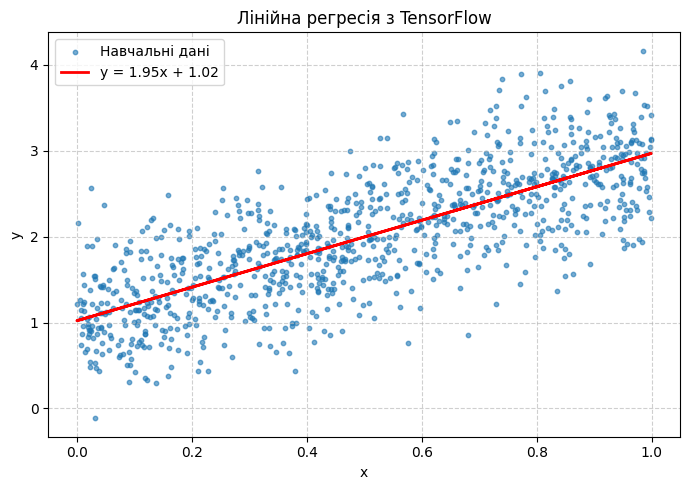

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

n = 1000
x_data = np.random.rand(n, 1)
noise = np.random.normal(0, 0.5, size=(n, 1))
y_data = 2 * x_data + 1 + noise

k = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.zeros([1]))

def model(x):
    return k * x + b

def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

def train(epochs=2000, log_step=200):
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = model(x_data)
            loss = loss_fn(y_data, y_pred)
        grads = tape.gradient(loss, [k, b])
        optimizer.apply_gradients(zip(grads, [k, b]))

        if epoch % log_step == 0:
            print(f"Епоха {epoch:4d}: loss={loss.numpy():.4f}, "
                  f"k={k.numpy()[0]:.4f}, b={b.numpy()[0]:.4f}")

train()

print("\nПісля навчання:")
print(f"k ≈ {k.numpy()[0]:.4f}, b ≈ {b.numpy()[0]:.4f}")

plt.figure(figsize=(7,5))
plt.scatter(x_data, y_data, s=10, alpha=0.6, label="Навчальні дані")
plt.plot(x_data, model(x_data), 'r', linewidth=2,
         label=f"y = {k.numpy()[0]:.2f}x + {b.numpy()[0]:.2f}")
plt.title("Лінійна регресія з TensorFlow")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()